# Introduction  <a id='introduction'></a>

This notebook contains Python code for a univariate linear regression task. Univariate linear regression means linear regression with one variable (feature). In addition to Python, we will also use Pandas, Numpy, and Matplotlib libraries. 

In this notebook, we will not dive into general concepts such as the definition of Machine Learning, unsupervised, or supervised learning. We will write Python code for the hypothesis, cost, and gradient descent functions. Next, we will train linear models with two different choices of $\theta_i$, where $i = 0,1$. Finally, we will evaluate our model using the test dataset. You may refer to [my Medium post](https://pub.towardsai.net/univariate-linear-regression-from-scratch-68065fe8eb09) for a more detailed explanation of those concepts.You may also refer to my [Multivariate Linear Regression from Scratch](https://www.kaggle.com/code/erkanhatipoglu/multivariate-linear-regression-from-scratch) notebook for a multivariate linear regression task.

This notebook is greatly inspired by the famous Machine Learning course by [Andrew Ng](https://www.andrewng.org/). As always, all the mistakes, if any, are made by me.

Finally, thanks to [@andonians](https://www.kaggle.com/andonians) for this dataset. Unfortunately, he is not active recently.


# Table of Contents
* [Introduction](#introduction)
* [Helper functions](#functions)
* [The Hypothesis](#hypothesis)
* [The Cost Function](#cost)
* [Gradient Descent](#gradient)
* [Loading Data](#getdata)
* [Model Training](#training)
* [Model Evaluation](#evaluation)
* [Conclusion](#conclusion)
* [References](#references)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


# Helper Functions   <a id='functions'></a>   

<div class="alert alert-block alert-info">
<b>Tip:</b> Tip: We will use some helper functions throughout the notebook. Collecting them in one place is a good idea, making the code more organized. First, we will define and explain those functions and then use them in our code.
</div>

# The  Hypothesis   <a id='hypothesis'></a>   

The hypothesis is a potential model for a machine learning system, as shown in the figure below ([What is a Hypothesis in Machine Learning?](https://machinelearningmastery.com/what-is-a-hypothesis-in-machine-learning/#:~:text=A%20statistical%20hypothesis%20is%20an,for%20mapping%20inputs%20to%20outputs.)).

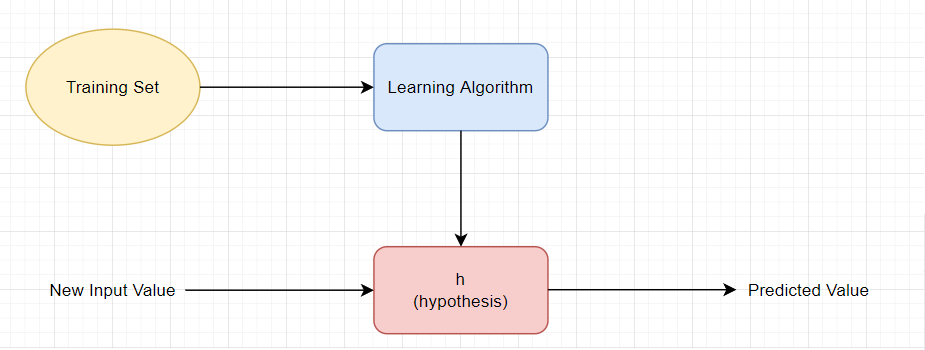

For a univariate linear regression model, the hypothesis is a linear equation of the form (Slope-intercept form) below:

$\hat{y} = h(x) = \theta_0 + \theta_1 x$

Where $\theta_0$ is the intercept, and $\theta_1$ is the slope. Our hypothesis function will calculate the predicted values (or targets) for a given set of inputs (features) and thetas ($\theta_i$, where $i = 0,1$). 

In [2]:
# The hypothesis
def h(x, theta_0 = 0, theta_1 = 0):
    """
    calculates the predicted values (or predicted targets) for a given set of inputs and thetas.
    :param x: inputs (feature values) - Numpy array of floats 
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :return: predicted targets - Numpy array of floats
    
    """
    return theta_0 + (theta_1 * x)

# The  Cost Function   <a id='cost'></a> 

The question is how to select the best possible line for our data. In other words, how to choose the best $\theta_i$, where $i = 0,1$, that fit our data for a hypothesis of the form $h(x) = \theta_0 + \theta_1 x$?

Note that each value of $\theta_i$ corresponds to a different hypothesis.

We can choose $\theta_i$ such that $h(x)$ is close to $y$ for all training examples.

One solution for this problem is to minimize $(\hat{y_i}-y_i)^2$ or, more precisely,

minimize $J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m} (h(x_i)-y_i)^2$, where $m$ is the number of training samples.

$J(\theta_0, \theta_1)$ is called the cost function, and the right-hand side of the equation is called the squared error function.  

In [3]:
# Cost function
def J(theta_0, theta_1, X, y):
    """
     calculates the total error for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats 
    :return: total error - floats
    
    """
    diff = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    diff_squared = np.square(diff)
    return (diff_squared.sum()/(len(X)*2))


# Gradient Descent   <a id='gradient'></a> 

The next question is how to minimize the cost function $J(\theta_0, \theta_1)$. We can use the gradient descent function for this purpose. Just like a person at the top of a mountain finds her way to the hillside by selecting the steepest direction in small steps, we can go in the opposite direction of the gradient of $J(\theta_0, \theta_1)$.

So the gradient descent algorithm for univariate linear regression is as follows:

repeat until convergence:

$\theta_i := \theta_i - \alpha\dfrac{\partial}{\partial\theta_i}J(\theta_0, \theta_1)$, where $i = 0,1$

and if we solve this equation for $\theta_0$ and $\theta_1$, we will find:

repeat until convergence: {

$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m} (h(x_i)-y_i)$

$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m} ((h(x_i)-y_i)x_i)$

}

In [4]:
# Gradient descent function
def gradient(theta_0, theta_1, alpha, X, y):
    """
     calculates the gradient descent for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param alpha: learning rate - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats 
    :return: calculated theta_0 and theta_1 - tuple of floats
    
    """
    my_array_0 = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    my_array_1 = np.matmul(np.transpose(my_array_0), X)
    
    theta_0_temp = (alpha / len(X)) * my_array_0.sum()
    theta_1_temp = (alpha / len(X)) * my_array_1.sum()
    
    new_theta_0 = theta_0-theta_0_temp
    new_theta_1 = theta_1-theta_1_temp
    
    return (new_theta_0, new_theta_1)    

# Loading Data   <a id='getdata'></a> 

As promised, we can now train our models. But first, we must load the data and make some necessary modifications. 

In [5]:
# Get the data
train_data = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test_data = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

# Set X and y for training
X_train = pd.DataFrame(data = train_data['x'])
y = pd.DataFrame(data = train_data['y'])

# Set X_test and y_test for evaluation
X_test_data = pd.DataFrame(data = test_data['x'])
y_test = pd.DataFrame(data = test_data['y'])

# Row 213 of the training data has no y value; as a result, we will drop it.
X_train.drop([213], inplace=True)
y.drop([213], inplace=True)

print(X_train.head())

# Convert the dataframes to a numpy arrays
X = X_train.to_numpy()
X_test = X_test_data.to_numpy()

      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0


# Model Training   <a id='training'></a> 

Before the training, we need to initialize some variables. Those are the initial $\theta_i$ and the learning rate. Generally, the $\theta_i$ are selected as zero at the beginning. We will also choose different values for $\theta_i$ to observe how the training is affected.

We need to decide when the gradient descent converges. To do that, we will subtract consecutive cost values. If the difference is smaller than a certain threshold, we will conclude that the gradient descent converges.

initial Cost: 1670.0624130893364
cost: 743.1010875141254

Iteration: 1
diff: 926.9613255752109
theta 0: 0.004993986917045781
theta 1: 0.33354245845185376
cost: 331.86123601466835

Iteration: 2
diff: 411.2398514994571
theta 0: 0.008319284972241516
theta 1: 0.5557035214498387
cost: 149.41757755535286

Iteration: 3
diff: 182.4436584593155
theta 0: 0.010533127355656115
theta 1: 0.7036773052035966
cost: 68.47773575109734

Iteration: 4
diff: 80.93984180425552
theta 0: 0.012006667742524593
theta 1: 0.8022375187713469
cost: 32.569345994371076

Iteration: 5
diff: 35.908389756726265
theta 0: 0.012987118705779484
theta 1: 0.8678850693676075
cost: 16.63884219635945

Iteration: 6
diff: 15.930503798011625
theta 0: 0.01363913995457535
theta 1: 0.9116106382126296
cost: 9.571386539860526

Iteration: 7
diff: 7.067455656498925
theta 0: 0.01407240560255936
theta 1: 0.9407347363616418
cost: 6.435959653629739

Iteration: 8
diff: 3.1354268862307872
theta 0: 0.014359965767857044
theta 1: 0.9601333019877012
co

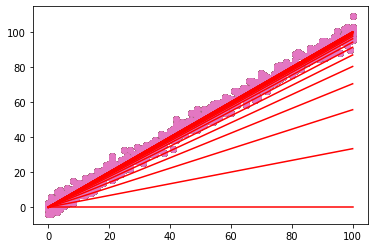

In [6]:
# Initialize theta_0, theta_1 and the learning rate 
alpha = 0.0001
theta_0 = 0
theta_1 = 0

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

# We will count the number of iterations
my_iter = 0

while diff >= my_diff:
    # Draw the current hypothesis and the training 
    # set to the x-y plane.
    # We will draw all the hypothesis lines so that
    # the reader can see how the hypothesis changes
    # with each iteration.
    my_line = np.linspace(0,100)
    z = theta_0 + theta_1 * (my_line)
    plt.scatter(X,y)
    plt.plot(my_line,z, 'r')
    
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)
    
    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    print("cost: {}".format(new_cost))
    
    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost
    
    my_iter += 1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("diff: {}".format(diff))
    print("theta 0: {}".format(theta_0))
    print("theta 1: {}".format(theta_1))
    
plt.show()    

As can be seen, if we choose $\theta_i$ as zero initially, the number of iterations is 27. But (0,0) point is at the y = x line, which is the best estimate for this dataset. In the next cell, we will assign different $\theta_i$ values to our initial guess and see how this choice affects the number of iterations.

initial Cost: 207505.03742208227

Iteration: 10000
Cost: 11.116903205237131
Diff: 0.0003601674161615165

Iteration: 20000
Cost: 8.284498617558627
Diff: 0.00021814652931340106

Iteration: 30000
Cost: 6.568965222022944
Diff: 0.00013212718895427855

Iteration: 40000
Cost: 5.529899389408219
Diff: 8.002691638608894e-05

Iteration: 50000
Cost: 4.900557047651989
Diff: 4.847077574865466e-05

Iteration: 60000
Cost: 4.51937640375524
Diff: 2.935782369295481e-05

Iteration: 70000
Cost: 4.288502563491975
Diff: 1.7781473444777873e-05

Iteration: 80000
Cost: 4.14866668522438
Diff: 1.0769899064122512e-05

Iteration: 90000
Cost: 4.063970762860149
Diff: 6.5231222912132125e-06

Iteration: 100000
Cost: 4.012672059308543
Diff: 3.950930662632857e-06

Iteration: 110000
Cost: 3.981601413725882
Diff: 2.3930032897467868e-06

Iteration: 120000
Cost: 3.9627825167541064
Diff: 1.449396417108062e-06

Final Cost: 3.9538191331407084
Diff: 9.999593206799773e-07
Theta 0: -0.5060916482754081
Theta 1: 1.006631498606685
It

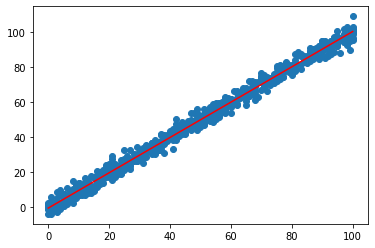

In [7]:
# Initialize theta_0, theta_1 and the learning rate 
alpha = 0.0001
theta_0 = -10
theta_1 = -10

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)

# We will count the number of iterations
my_iter = 0
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

while diff >= my_diff:
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)
    
    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    
    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost
    
    # print for every 10000 iteration
    my_iter += 1
    if my_iter%10000 ==0:
        print()
        print("Iteration: {}".format(my_iter))
        print("Cost: {}".format(new_cost))
        print("Diff: {}".format(diff))

print()
print("Final Cost: {}".format(new_cost))
print("Diff: {}".format(diff))
print("Theta 0: {}".format(theta_0))
print("Theta 1: {}".format(theta_1))
print("Iteration: {}".format(my_iter))
print()

# Draw the final hypothesis and the training 
# set to the x-y plane.
# We will not draw all the hypothesis lines 
# because of the high iteration count.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X,y)
plt.plot(my_line,z, 'r')
plt.show()    

# Model Evaluation   <a id='evaluation'></a> 

Finally, we can evaluate our model with the test set. We will use the following values for $\theta_i$ since they are the last calculated values as seen at the output of the last cell.

$\theta_0: -0.5060916482754081$

$\theta_1: 1.006631498606685$

Cost of test data: 4.7015230120840545


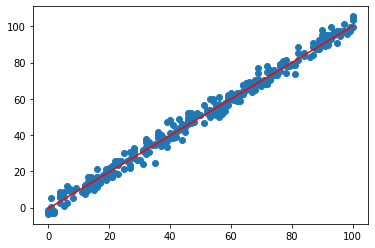

In [8]:
# calculate the cost value for the test set
cost_test = J(theta_0, theta_1, X_test, y_test)
print("Cost of test data: {}".format(cost_test))

# Draw the final hypothesis and the test 
# set to the x-y plane.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X_test,y_test)
plt.plot(my_line,z, 'r')
plt.show()    

# Conclusion   <a id='conclusion'></a> 

In this notebook, we have written the hypothesis, cost function, and gradient descent algorithms in python. Moreover, we have trained two different models by changing model parameters $\theta_0$ and $\theta_1$. We have seen that choosing a point on the best fitting line may substantially decrease the number of iterations.

In the preparation process of this notebook, [deeplearning.AI](https://www.deeplearning.ai/) has announced a new Machine Learning Specialization by [Andrew Ng](https://www.andrewng.org/) on Coursera. Unlike the previously mentioned Machine Learning Course, this Specialization's assignments are written in Python. Anyone interested may follow the link in the reference section.

Please feel free to correct me if I've made mistakes, and also, if you face any problems or cannot implement the code, just let me know via the comments. I will try to answer as soon as possible.

Thank you for reading!

# References   <a id='references'></a>
* [Machine Learning Specialization - Deeplearning.AI](https://www.deeplearning.ai/program/machine-learning-specialization/)
* [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng)
* [@andonians](https://www.kaggle.com/andonians)
* [What is a Hypothesis in Machine Learning?](https://machinelearningmastery.com/what-is-a-hypothesis-in-machine-learning/#:~:text=A%20statistical%20hypothesis%20is%20an,for%20mapping%20inputs%20to%20outputs.)
* [Linear Equations and Lines](http://www.math.utah.edu/~wortman/1060text-leal.pdf)
* [10-simple-hacks-to-speed-up-your-data-analysis - Parul Pandey](https://www.kaggle.com/parulpandey/10-simple-hacks-to-speed-up-your-data-analysis)
* [Univariate Linear Regression From Scratch - Towards AI](https://pub.towardsai.net/univariate-linear-regression-from-scratch-68065fe8eb09)